### Linear Regression Tutorial
Author: Dr. Sampath Lonka

Date: July 21, 2022

Data set: tips.csv

In this tutorial, we develop a linear model for given dataset `tips.csv`

In [1]:
#load the libraries
import pandas as pd 
import numpy as np 

In [2]:
#load the data
data = pd.read_csv("E:/MDSC-ML/MDSC-ML-Lab/Datasets/tips.csv")
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Full description of dataset

- `total_bill`: Total bill in dollars including tax
- `tip`: Tip given to waiter in dollars
- `sex`: gender of the person paying the bill
- `smoker`: whether the person smoked or not
- `day`: day of the week
- `time`: lunch or dinner
- `size`: number of people

In [47]:
#info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
 7   tip_rate    244 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 15.4 KB


There are no **missing** values in the data.

### Waiter Tips Analysis

We consider the following features:

1. the total bill paid
2. number of people at a table
3. the day of the week 

In [48]:
#load the libraries for visualization
import matplotlib.pyplot as plt 
import seaborn as sns   

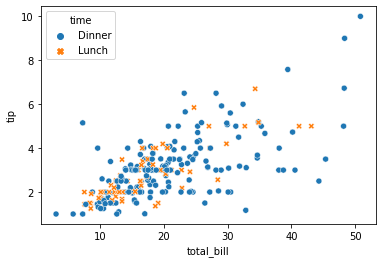

In [4]:
#scatter plot using seaborn
sns.scatterplot(data=data, x="total_bill",y="tip", hue="time",style="time")
plt.show()

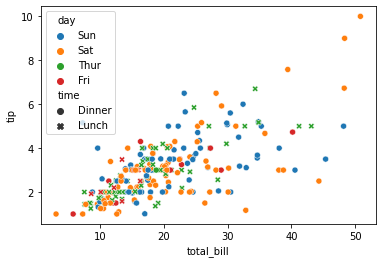

In [8]:
#variants of scatter plots using seaborn features
sns.scatterplot(data=data, x="total_bill",y="tip", hue="day",style="time")
plt.show()

In [5]:
#create new feature "tip_rate"
data["tip_rate"] = data["tip"]/data["total_bill"]
data.head()

total_bill   tip     sex smoker  day    time  size  tip_rate
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808

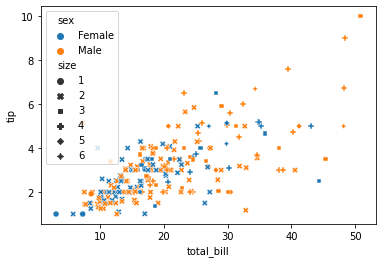

In [6]:
sns.scatterplot(data=data, x="total_bill",
                    y="tip", style="size", hue= "sex")
plt.show()

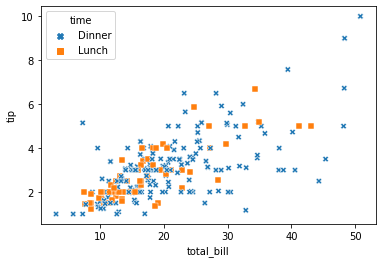

In [15]:
#customize makers
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(data=data, x="total_bill", y="tip", style="time",hue="time", markers=markers)
plt.show()

### Some useful pie charts using `plotly`

In [7]:
#load ploty
import plotly.express as px

In [8]:
#pie chart for tip labels as smoker: Yes or No
figure = px.pie(data,
                values='tip',
                names = 'smoker',
                hole =0.5)
figure.show()

There are other pie charts given below:

In [9]:
figure = px.pie(data,
                values='tip',
                names = 'sex',
                hole =0.5)
figure.show()

In [10]:
figure = px.pie(data,
                values='tip',
                names = 'day',
                hole =0.5)
figure.show()

Convert the labels into numeric values.

In [11]:
data["sex"] = data["sex"].map({"Female":0,"Male":1}) 
data['smoker'] = data["smoker"].map({"No":0,"Yes":1})
data["day"] = data["day"].map({"Thur":0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch":0, "Dinner":1})
data.head()

total_bill   tip  sex  smoker  day  time  size  tip_rate
0       16.99  1.01    0       0    3     1     2  0.059447
1       10.34  1.66    1       0    3     1     3  0.160542
2       21.01  3.50    1       0    3     1     3  0.166587
3       23.68  3.31    1       0    3     1     2  0.139780
4       24.59  3.61    0       0    3     1     4  0.146808

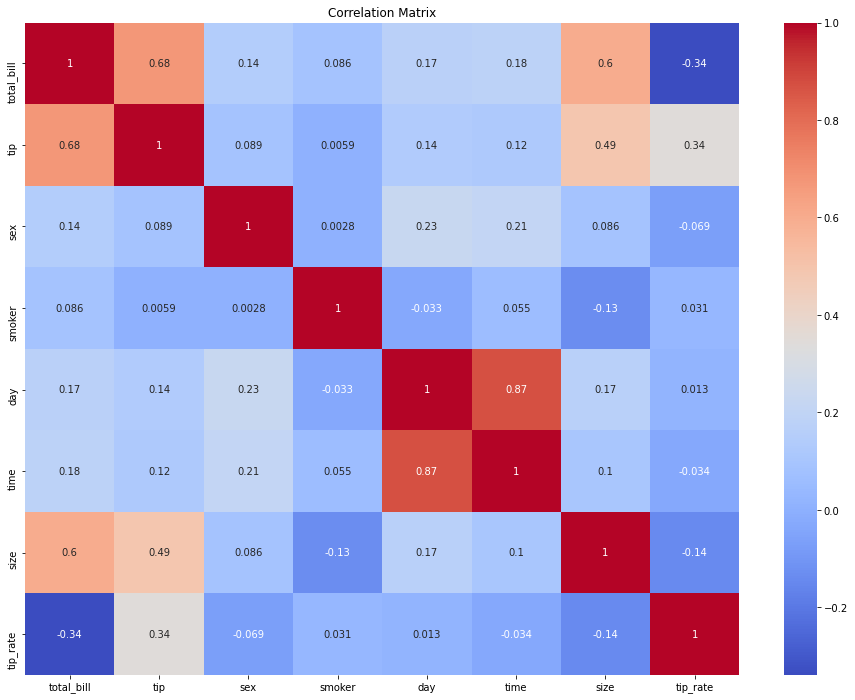

In [12]:
# correlation matrix
correlations = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

## The Maximum Likelihood Estimation:

Let $(x_1,y_1),\ldots, (x_n,y_n)$ be the n-sample points with $x_i\in \mathbb{R}^k$ and $y_i\in\mathbb{R}.$ Using these sample points, we want to develop a linear model as follows:
$$y = X\theta+\epsilon,\ \epsilon\sim N(0,\sigma^2)$$
where $\theta = (\theta_0,\ldots, \theta_k)^T$ and the matrix $X$ of order $n\times(k+1)$ given as 
$$\begin{bmatrix}
1 &x_{11}&\cdots&x_{1k}\\
1 &x_{21}&\cdots&x_{2k}\\
\vdots&\vdots&\ddots&\vdots\\
1 &x_{n1}&\cdots&x_{nk}\\
\end{bmatrix} $$ 

In [13]:

# define the maximum likelihood estimation
def mle_estimater(X,y):
    """
    X is nxk matrix (n_samples, k_features)
    y is nx1 matrix (n_samples,)
    
    Returns: the maximum likelihood estimator         
    """
    n, k = X.shape
    # the shape of augmented matrix is nx(k+1)
    X_aug = np.hstack([np.ones((n,1)),X])
    #the maximum likelihood estimation
    theta_ml = np.linalg.solve(X_aug.T@X_aug, X_aug.T@y)
    return theta_ml

def predict_mle(Xtest,theta):
    """
    Xtest: (n_samples, k_features) matrix
    theta: the maximum likelihood estimator

    Returns: array of prediction values for given test samples
     """
    n, k = Xtest.shape
    Xtest_aug = np.hstack([np.ones((n,1)),Xtest]) 
    y_hat = Xtest_aug@theta 
    return y_hat

In [24]:
# compute mle_estimator
X = np.array([-3, -2, 0, 1, 2]).reshape(-1,1)
y = np.array([1.6, 0.5, 1, 3, 5]).reshape(-1,1)

In [28]:
#compute the theta
theta= mle_estimater(X,y)
print(theta)

[[2.49069767]
 [0.67674419]]


In [33]:
#test sample
Xtest = np.array([-3, 1,4]).reshape(-1,1)
predict_mle(Xtest,theta)

array([[0.46046512],
       [3.16744186],
       [5.19767442]])

### Modeling 

We use above definitions `mle_estimator` and `predict_mle` to develop linear model and predictions on `tips.csv`.

In [21]:
#convert as np array
X = np.array(data[["total_bill","sex","smoker", "day", 
                   "time", "size"]])
y = np.array(data["tip"])
print(X.shape)
print(y.shape)

(244, 6)
(244,)


In [15]:
#split train and test
Xtrain = X[0:220]
ytrain = y[0:220]  
Xtest = X[220:]  
ytest = y[220:]

In [16]:
#shape of training data
Xtrain.shape

(220, 6)

In [49]:
#estimated parameters based on training data
theta = mle_estimater(Xtrain,ytrain)
print(f"Estimated parameters based on train data: {theta}")

Estimated parameters based on train data: [ 0.66433097  0.0944405   0.02456897 -0.18117471  0.06380238 -0.19306402
  0.23194949]


In [50]:
#predictions on test samples
y_pred = predict_mle(Xtest,theta)
print(f"Predictions on test samples: {y_pred}")

Predictions on test samples: [2.95915033 1.9793852  3.93355525 3.81512843 2.17478172 2.65950784
 3.65751199 2.30684737 2.5469726  2.27028847 2.87845875 2.10446382
 2.13402126 2.33746574 1.84729628 3.12055033 2.97055543 3.18916799
 2.61631688 5.73865153 3.48064358 3.26948544 2.23303951 1.98924641
 3.15115427 2.25680834 2.12104595 3.26905178 3.17236483 6.62813881
 4.9784413  1.6371344  3.23322391 2.82236266 2.96117781 3.86625614
 1.97848176 5.48228412 2.37106691 3.04713105 2.07990929 2.49950599
 3.41299197 2.3340929  1.94813896 0.93957882 1.88172086 3.08438206
 1.86676908]


In [51]:
#compare ground truth and prediction values
pd.DataFrame({"y":ytest, "y_pred":y_pred}).head()

y    y_pred
0  3.18  2.959150
1  2.00  1.979385
2  2.00  3.933555
3  5.16  3.815128
4  2.00  2.174782

### Modeling using `sklearn`

We use `sklearn` to perform the same as in the last section.

In [23]:
#split the data into train and test
from sklearn.model_selection import train_test_split
#train is 80% and test is 20% of the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
#load the regression model from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#fit the model based on train samples
model.fit(Xtrain,ytrain)

LinearRegression()

In [53]:
#predictions on first 10 samples from test data
y_pred = model.predict(Xtest)

In [56]:
#compare ground truth and prediction values using sklearn
pd.DataFrame({"y":ytest, "y_pred":y_pred}).tail()

y    y_pred
44  2.00  1.948139
45  1.00  0.939579
46  1.61  1.881721
47  2.31  3.084382
48  1.44  1.866769

In [31]:
#print the parameters
print(f"The coefficients are: {model.coef_}") 
print(f"The intercept of the model is: {model.intercept_}")  

The coefficients are: [ 0.0944405   0.02456897 -0.18117471  0.06380238 -0.19306402  0.23194949]
The intercept of the model is: 0.6643309656240288


In [57]:
#R^2 coefficient
model.score(X,y)

0.46383156086801336

### Health Insurance Prediction

Dataset: [Health Insurance Dataset](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset?resource=download)

Question:

1. Explore the dataset 
2. Perform EDA (must include scatter plots, pie charts, Histograms, Boxplots, correlation plots) and make the inferences
3. Develop a linear model for the response variable `charges` using all availble other features
4. Evaluate the model 